This is a continuation from the preproprocessing stage which can be found [here](https://colab.research.google.com/drive/1EO5_t9hXskUuCCZlR2fgIYA7cvdhPy7o#scrollTo=pySKVB1mgfxg)

In [ ]:
clean_data_path = "/content/drive/MyDrive/cleaned-MY2010-2014 Fuel Consumption Ratings 5-cycle (Dataset).csv" # Path to access the cleaned data set from the prepeocessing

In [ ]:
# Import libaries needed for our modeling
import pandas as pd

In [ ]:
def csv_to_df (path):
  """
  This function takes in filepath of the csv file and returns it data frame
  """
  data_columns = ["MODEL (YEAR)", "MAKE", "MODEL", "VEHICLE CLASS", "ENGINE SIZE (L)", "CYLINDERS", "TRANSMISSION", "FUEL TYPE", "CITY (L/100 km)", "HWY (L/100 km)", "COMB (L/100 km)", "COMB (mpg)", "CO2 EMISSIONS"] # The columns to be read. This is important when the data sheet contains irrelevant columns
  df = pd.read_csv(path, low_memory=False, usecols = data_columns) 
  return df

In [ ]:
clean_data = csv_to_df (clean_data_path) # Call the function to get the data frame of the cleaned data
clean_data.head(5) # Show to see first five rows of the dataset

,MODEL (YEAR),MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE (L),CYLINDERS,TRANSMISSION,FUEL TYPE,CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),COMB (mpg),CO2 EMISSIONS
0,2010.0,0,0,0,2.0,4.0,0,0,10.9,7.8,9.5,30.0,219.0
1,2010.0,0,0,0,2.0,4.0,1,0,10.0,7.6,8.9,32.0,205.0
2,2010.0,0,0,0,2.0,4.0,2,1,11.6,8.1,10.0,28.0,230.0
3,2010.0,0,1,1,3.7,6.0,3,1,14.8,11.3,13.2,21.0,304.0
4,2010.0,0,2,1,2.3,4.0,0,1,13.2,10.3,11.9,24.0,274.0


Answering question 2:

Using all the numerical continous variables to build a model that predicts CO2 emission.

In [ ]:
all_training_columns = [tf for tf in clean_data.columns if tf not in ('CO2 EMISSIONS')] # Possible columns that can be used for the training
categorical_cols = ['MAKE', 'MODEL', 'VEHICLE CLASS', 'TRANSMISSION', 'FUEL TYPE'] # These are columns with categorical data
numerical_cols = ['ENGINE SIZE (L)', 'CYLINDERS', 'CITY (L/100 km)', 'HWY (L/100 km)', 'COMB (L/100 km)', 'COMB (mpg)'] # These are numerical data

In [ ]:
numerical_data_df = clean_data.drop(columns=categorical_cols) # Drop the categorical columns from the data frame. Now, left with the numerical columns and the target column
numerical_data_df.head(5) # Show to see the data frame is modified

,MODEL (YEAR),ENGINE SIZE (L),CYLINDERS,CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),COMB (mpg),CO2 EMISSIONS
0,2010.0,2.0,4.0,10.9,7.8,9.5,30.0,219.0
1,2010.0,2.0,4.0,10.0,7.6,8.9,32.0,205.0
2,2010.0,2.0,4.0,11.6,8.1,10.0,28.0,230.0
3,2010.0,3.7,6.0,14.8,11.3,13.2,21.0,304.0
4,2010.0,2.3,4.0,13.2,10.3,11.9,24.0,274.0


Model training - without Scaling (Before feature selection)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
target = 'CO2 EMISSIONS'
numerical_features = numerical_data_df.columns[numerical_data_df.columns != target]
X = numerical_data_df[numerical_features].values
y = numerical_data_df[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=123)

ln_reg = LinearRegression()

ln_reg.fit(X_train, y_train)

y_train_pred = ln_reg.predict(X_train)

y_test_pred = ln_reg.predict(X_test)

Model evaluation - without scaling 

In [ ]:
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'MSE train: {mse_train: .2f}')
print(f'MSE test: {mse_test: .2f}')

MSE train:  508.34
MSE test:  514.11


In [ ]:
from sklearn.metrics import  r2_score
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f'R^2 train: {train_r2:.3f}, R^2 test: {test_r2:.3f}')

R^2 train: 0.876, R^2 test: 0.878


Model training -  With Scaling (Before feature selection)

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=123) # Spliting before scaling to prevent data leakage

sc_X = StandardScaler()
sc_y = StandardScaler()

std_Xtrain = sc_X.fit_transform(X_train)
std_Xtest = sc_X.fit_transform(X_test)
std_ytrain = sc_y.fit_transform(y_train[:,np.newaxis]).flatten() # Scaler works with 2D array. Therefore, [:,np.newaxis] introduces the new dimension and .flatten() turns it back to 1D after scaling
std_ytest = sc_y.fit_transform(y_test[:,np.newaxis]).flatten()

ln_reg.fit(std_Xtrain, std_ytrain) # Still using the same LR initialized 

y_train_pred_std = ln_reg.predict(std_Xtrain)

y_test_pred_std = ln_reg.predict(std_Xtest)

Model Evaluation -  With Scaling

In [ ]:
mse_train = mean_squared_error(std_ytrain, y_train_pred_std)
mse_test = mean_squared_error(std_ytest, y_test_pred_std)
print(f'MSE train: {mse_train: .2f}')
print(f'MSE test: {mse_test: .2f}')

MSE train:  0.12
MSE test:  0.12


In [ ]:
train_r2 = r2_score(std_ytrain, y_train_pred_std)
test_r2 = r2_score(std_ytest, y_test_pred_std)
print(f'R^2 train: {train_r2:.3f}, R^2 test: {test_r2:.3f}')

R^2 train: 0.876, R^2 test: 0.879


Exploratory data analysis to guide selection of subsets of variables from the numerical columns for training the Linear Regression model.

In [ ]:
!pip install mlxtend==0.21
!pip install pandas==0.23.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.3 MB 5.1 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 0.23.4
    Uninstalling pandas-0.23.4:
      Successfully uninstalled pandas-0.23.4


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pandas-0.23.4-cp37-cp37m-manylinux1_x86_64.whl (8.8 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 0.20.2 requires pandas>=1.1, but you have pandas 0.23.4 which is incompatible.
pymc 4.1.4 requires pandas>=0.24.0, but you have pandas 0.23.4 which is incompatible.
prophet 1.1.1 requires pandas>=1.0.4, but you have pandas 0.23.4 which is incompatible.
plotnine 0.8.0 requires pandas>=1.1.0, but you have pandas 0.23.4 which is incompatible.
pandas-gbq 0.17.9 requires pandas>=0.24.2, but you have pandas 0.23.4 which is incompatible.
mlxtend 0.21.0 requires pandas>=0.24.2, but you have pandas 0

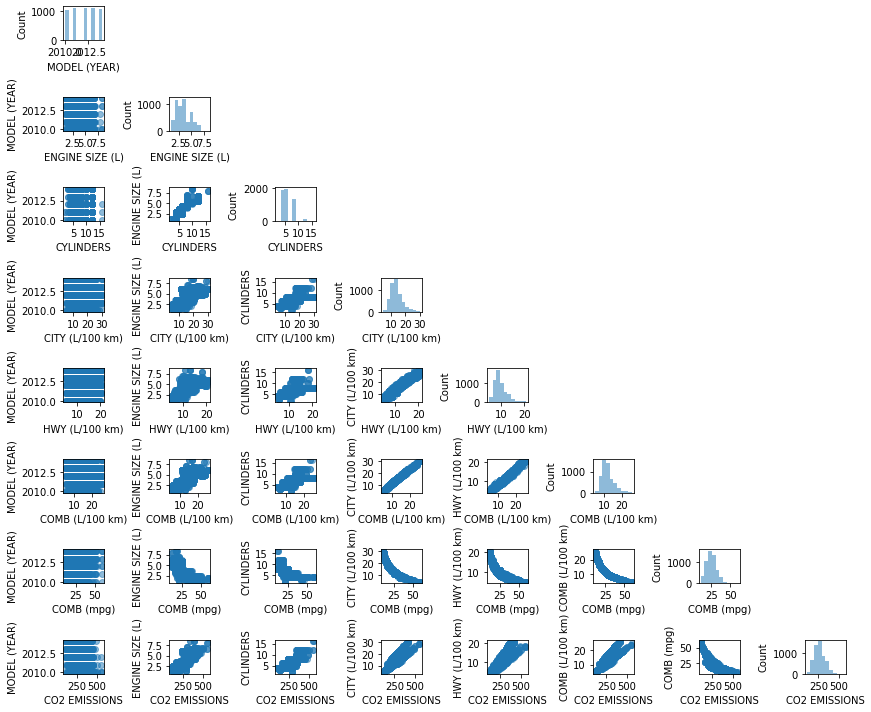

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

scatterplotmatrix(numerical_data_df.values, figsize=(12, 10), names = numerical_data_df.columns, alpha = 0.5) # Using the numerical columns dataframe

plt.tight_layout()
plt.show()

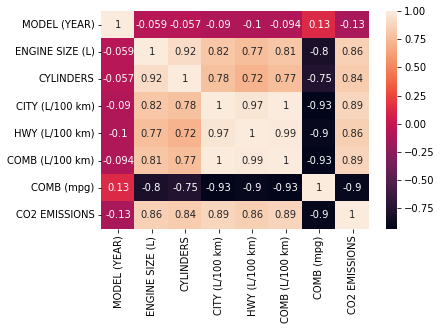

In [ ]:
import seaborn as sn

corr_mat = numerical_data_df.corr()
sn.heatmap(corr_mat, annot=True)
plt.show()

The above visualizations are to show how the numerical features relate with one another. 

For the purpose of selecting variables that would best fit the Linear Regression model, features that fit into a linear relationship with CO2 Emissions, which is the target variable, would be selected.

These features would be: ENGINE SIZE (L), CYLINDERS, CITY (L/100 km), HWY (L/100 km), and COMB (L/100 km). These features would exclusively be used in training the LR model.

In [ ]:
non_linear_features = ["MODEL (YEAR)", "COMB (mpg)"]  # 
selected_data_df = numerical_data_df.drop(columns = non_linear_features) # Drop the features that do not have linear relationship with the target variable
selected_data_df.head(5) # Show to see the data frame is modified

,ENGINE SIZE (L),CYLINDERS,CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),CO2 EMISSIONS
0,2.0,4.0,10.9,7.8,9.5,219.0
1,2.0,4.0,10.0,7.6,8.9,205.0
2,2.0,4.0,11.6,8.1,10.0,230.0
3,3.7,6.0,14.8,11.3,13.2,304.0
4,2.3,4.0,13.2,10.3,11.9,274.0


Model training for selected features

In [ ]:
target = 'CO2 EMISSIONS'
selected_features = selected_data_df.columns[selected_data_df.columns != target]
X = selected_data_df[selected_features].values
y = selected_data_df[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=123)

ln_reg = LinearRegression()

ln_reg.fit(X_train, y_train)

y_train_pred = ln_reg.predict(X_train)

y_test_pred = ln_reg.predict(X_test)

Model evaluation - for selected features

In [ ]:
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f'R^2 train: {train_r2:.3f}, R^2 test: {test_r2:.3f}')

R^2 train: 0.851, R^2 test: 0.859


Contrary to expectation, the performance worsens, when the values of the R^2 are compared. An hypothetical explanation, which is not uncommon to regression problems, is that the most important relationshp with the target variable is a polynomial, not linear. And this is by the "COMB (mpg)". This would be why its exclusion could worsen the performance of the regression model.

Answering Question 3:

Determine whether there were noticeable improvements in the CO2 emission from year 2010 to 2014.

In [ ]:
# Use GroupBy() & compute sum to get the total emission per year
df2 = clean_data.groupby('MODEL (YEAR)')['CO2 EMISSIONS'].sum() # I am using the clead_data df here.
print(df2)

MODEL (YEAR)
2010.0    286358.0
2011.0    297755.0
2012.0    294203.0
2013.0    281774.0
2014.0    274301.0
Name: CO2 EMISSIONS, dtype: float64


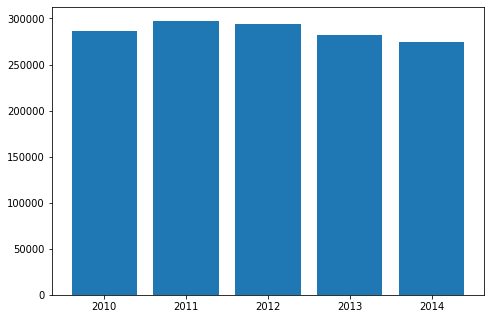

In [ ]:
fig = plt.figure() # Information derived above is now used to plot a bar chart
ax = fig.add_axes([0,0,1,1])
year = [2010, 2011, 2012, 2013, 2014]
emission = [286358, 297755, 294203, 281774, 274301]
ax.bar(year, emission)
plt.show()

Answering Question 4: 

Using each categorical variable as the target variable at each instance, determine which of the variables performed best in classifying the dataset. Explain your findings.

My understanding of this is to turn this problem to a classification problem and see the strength of each feature in classifying the chosen class which is every instance of the categorical feature in the dataset.

In [ ]:
from sklearn import preprocessing # Import neccesary libaries. I will be using the feature importance function in XGBoost to rank the importance of each feature for each instance of the categorical columns
import xgboost as xgb
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
categorical_cols = ['MAKE', 'MODEL', 'VEHICLE CLASS', 'TRANSMISSION', 'FUEL TYPE'] # These are the columns with categorical data

In [ ]:
def train_for_col(cate_cols):
  """
  Train the data using each of the columns in the categorical columns as target to get the feature importance ranking
  """
  for col in tqdm(cate_cols):
    training_columns = get_training_columns(col)
    train(training_columns, col)

In [ ]:
def get_training_columns(col):
  """
  This function gets the training columns from the entire dataframe by excluding the categorical data provided
  """
  training_columns = [tf for tf in clean_data.columns if tf not in (col)]
  return training_columns

In [ ]:
def train (training_columns, col):
  """
  Trains for each col of the categorical columns using its corresponding training columns
  """
  X = clean_data[training_columns].values
  y =  clean_data[col].values

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=123)
    
  xgb_model = xgb.XGBClassifier(n_jobs=-1) #Initialize XGboost model

  #Fit the model on training data
  xgb_model.fit(X_train, y_train)
    
  #Feature importance plotting for XGBoost
  importances = xgb_model.feature_importances_
  col_names = training_columns
    
  idxs = np.argsort(importances)
    
  plt.figure(figsize=(16,14))
    
  plt.title(f'Feature Importances for target {col}')
  plt.barh(range(len(idxs)), importances[idxs], align='center')
    
  plt.yticks(range(len(idxs)), [col_names[i] for i in idxs])
  plt.xlabel(f'XGBoost Feature Importance for target {col}')
  plt.show

100%|██████████| 5/5 [04:04<00:00, 48.90s/it]


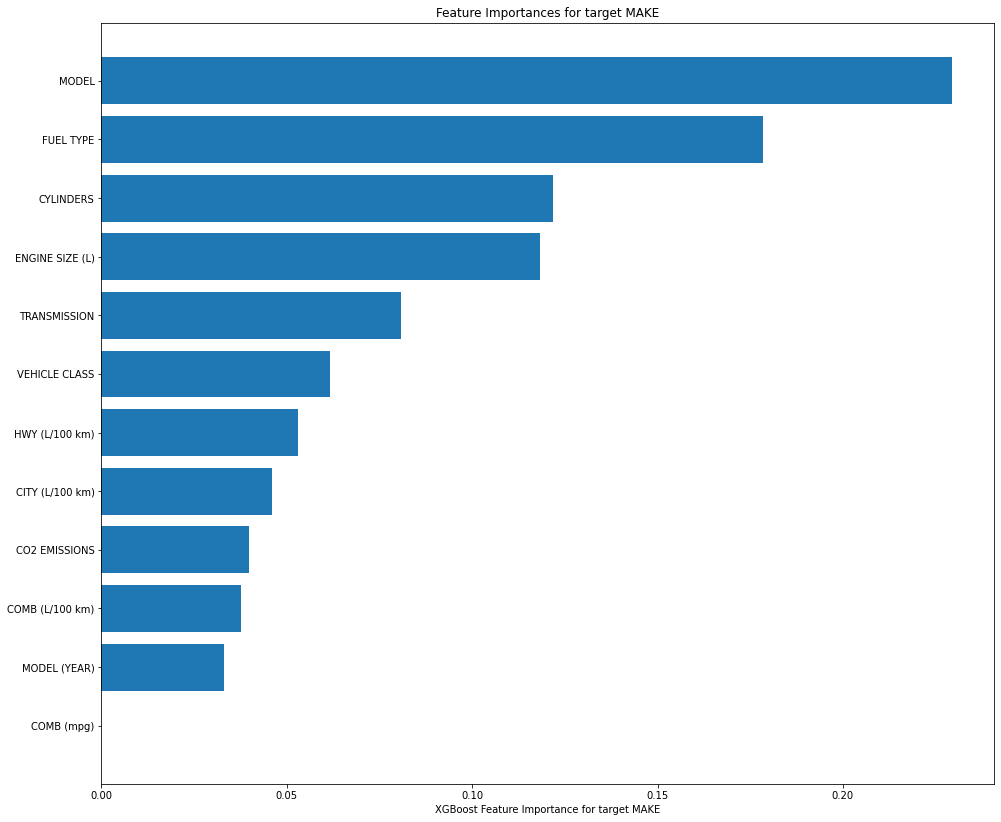

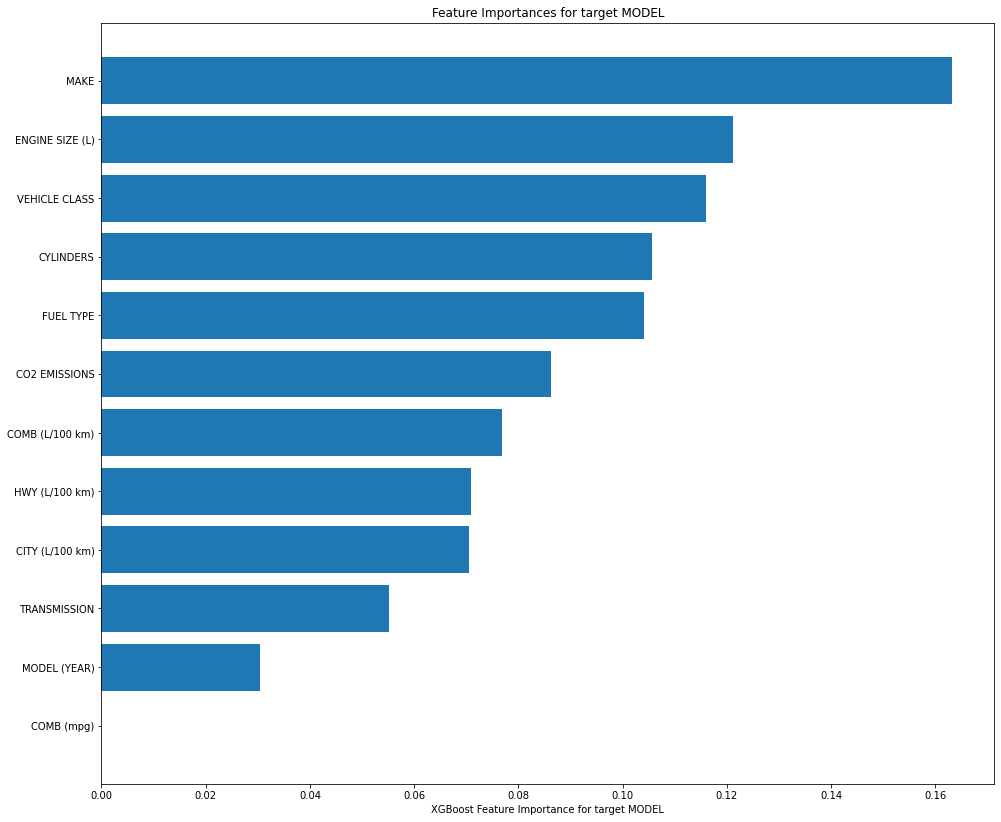

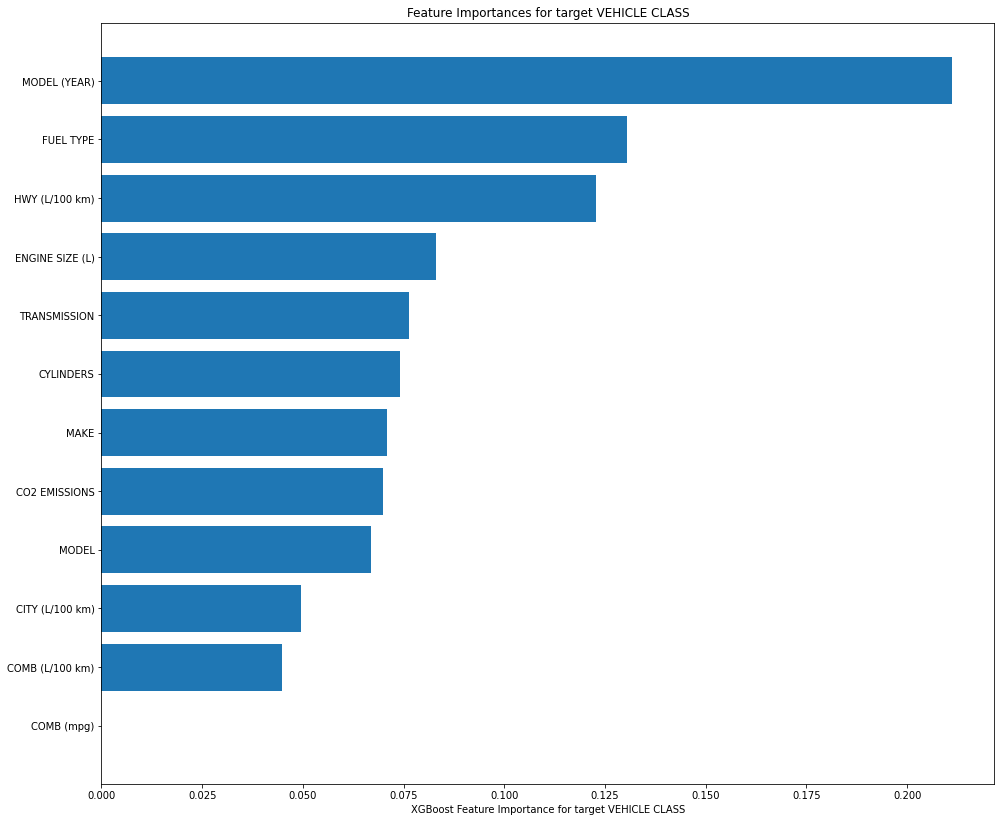

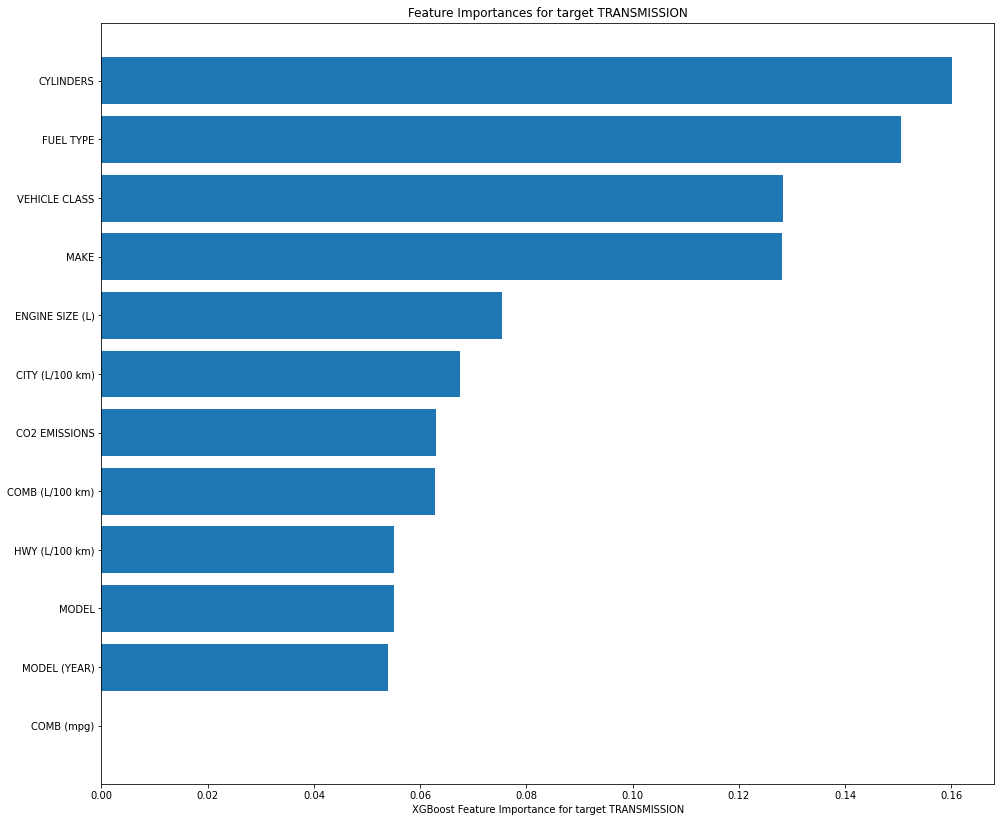

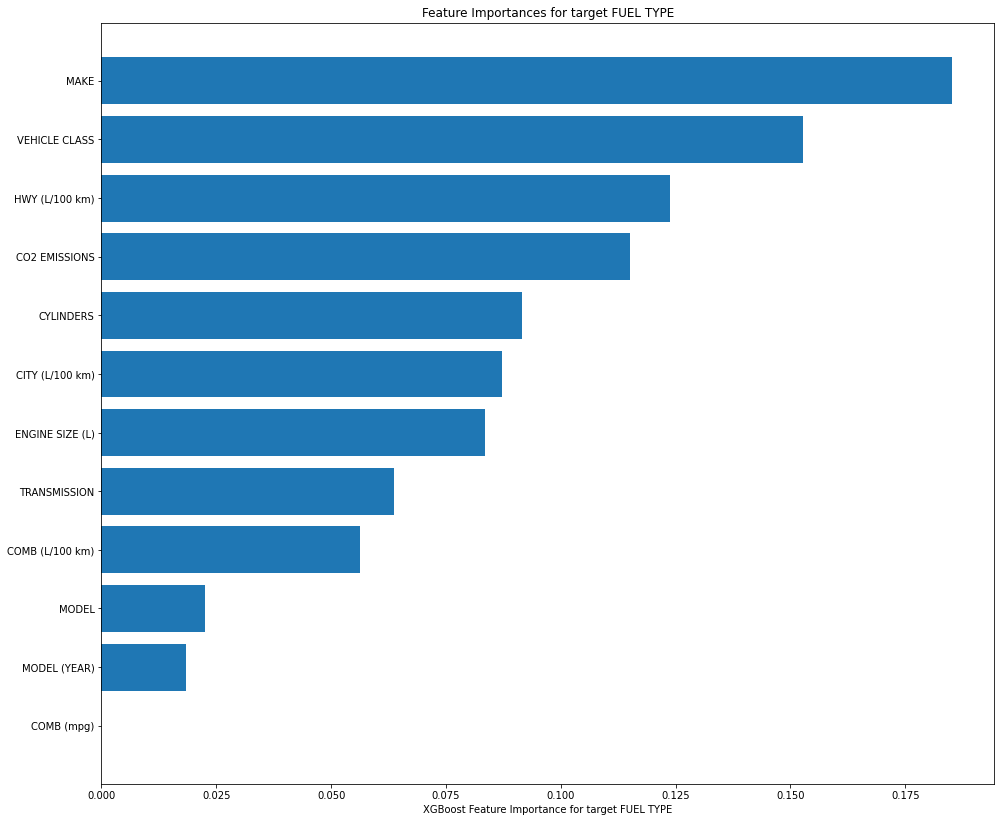

In [ ]:
train_for_col(categorical_cols) # Call the function

Answering question 5:

How did you check whether your models did not overfit?

By comparing the R-squared values of the train and test data. In the previous cell above where the train and test are done, the values are R^2 train: 0.851, R^2 test: 0.859. 

A difference of 0.007 is arguably not overfitting.

Answering question 6:

State the performance measure(s) you were most interested in and the reason(s).

R-squared and Mean Squared Error (MSE) were used, but the most interesting is R-squared becaused it is the value is self-descriptive of the accuracy performance. 

The consistency of the value where the features are either scaled or not also makes understanding it easier.

Answering question 7:

Can your models be deployed based on their performances? Explain.


An 85% accuracy model is good enough for deployment with the expectation of re-training as more data are collected.

Answering question 8:

